<a href="https://colab.research.google.com/github/MArcoAEAandrade/ic-inclusao-financeira/blob/main/02_cruzamentos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Cruzamentos e Análise de Inadimplência (IC Marketing)

Este notebook faz parte da Iniciação Científica 'Inclusão Financeira de Jovens Periféricos: Comportamento e Barreiras' e serve como base para a coleta de dados primários.

## Preparação de Dados para Cruzamento

In [220]:
import pandas as pd

In [221]:
import numpy as np

In [222]:
import matplotlib.pyplot as plt

In [223]:
import seaborn as sns

In [224]:
pd.set_option('display.max_columns', None)

In [225]:
file_path_financeira = 'Anexo_Estatístico_do_Relatório_de_Cidadania_Financeira_2021.xlsx'

In [226]:
file_path_formulario_respostas = 'Formulario_respostas_IC.xlsx'

In [227]:
file_path_pnadc = 'PNADC-PesquisaNacionalporAmostradeDomicíliosContínua-SãoPaulo.csv'

In [228]:
df_pnadc = pd.read_csv(file_path_pnadc, sep=';')

### Cruzamento 1: Exclusão Estrutural (PNADC) e Vulnerabilidade Financeira (Relatório Financeiro)

In [229]:
# Filtrar dados de jovens (15-29 anos) ocupação de estudo e raça/cor (Preta ou Parda) no PNADC

In [230]:
df_jovens_ocupacao_estudo = df_pnadc[df_pnadc['Nível'].isin(['7.5.1.1', '7.5.1.2', '7.5.1.3', '7.5.1.4'])].copy()

In [231]:
df_jovens_ocupacao_estudo.rename(columns={'Indicador': 'Situação'}, inplace=True)

In [232]:
df_jovens_ocupacao_estudo = df_jovens_ocupacao_estudo [['Situação', '2024']][['Situação', '2024']]


#### Tabela de Situação de Ocupação e Estudo (Jovens 15-29 anos)

In [233]:
print(df_jovens_ocupacao_estudo.to_markdown(index=False))

| Situação                   |   2024 |
|:---------------------------|-------:|
| Não ocupada e estudando    |   22.2 |
| Ocupada e não estudando    |   44.2 |
| Ocupada  e estudando       |   19.4 |
| Não ocupada, nem estudando |   14.2 |


###Tabela de Situação de Raça/cor (Jovens 15-29 anos)


In [234]:
df_raca = df_pnadc.loc[
    df_pnadc['Nível'].isin(['7.3.1.2.2.1', '7.3.1.2.2.2']),
    ['Indicador', '2024']
].copy()

df_raca.rename(columns={'Indicador': 'Raça/Cor'}, inplace=True)

In [235]:
print(df_raca.to_markdown(index=False))

| Raça/Cor       |   2024 |
|:---------------|-------:|
| Branca         |    3.9 |
| Preta ou parda |   11.9 |


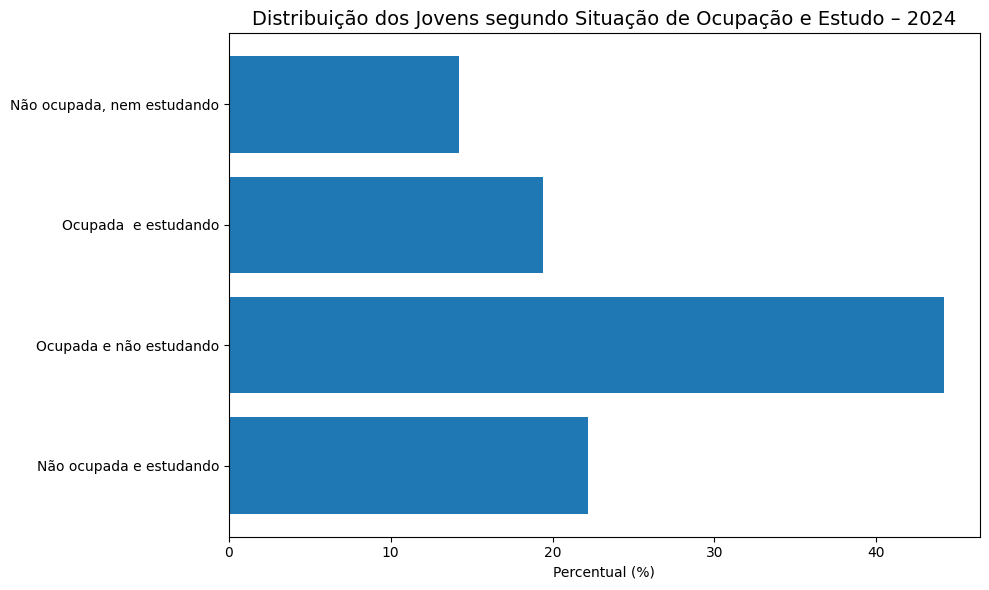

In [236]:
plt.figure(figsize=(10,6))

plt.barh(
    df_jovens_ocupacao_estudo['Situação'],
    df_jovens_ocupacao_estudo['2024']
)

plt.xlabel('Percentual (%)')
plt.title(
    'Distribuição dos Jovens segundo Situação de Ocupação e Estudo – 2024',
    fontsize=14
)

plt.tight_layout()
plt.show()


“A distribuição dos jovens segundo situação de ocupação e condição de estudo evidencia que uma parcela significativa 14% encontra-se fora do sistema educacional e do mercado de trabalho, configurando um grupo em situação de maior vulnerabilidade social. Observa-se ainda que a inserção educacional não é homogênea, reforçando a importância de análises complementares por recortes sociodemográficos.”

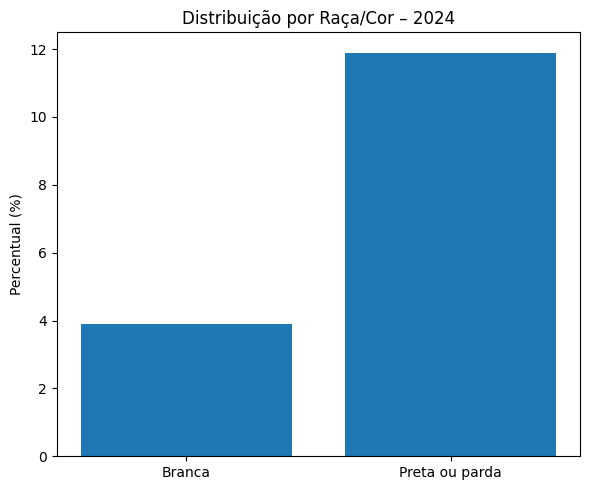

In [237]:
plt.figure(figsize=(6,5))
plt.bar(df_raca['Raça/Cor'], df_raca['2024'])
plt.ylabel('Percentual (%)')
plt.title('Distribuição por Raça/Cor – 2024')
plt.tight_layout()
plt.show()

Embora os dados não permitam o cruzamento direto entre cor ou raça e situação de ocupação em nível individual, a análise conjunta dos indicadores evidencia que a população jovem apresenta elevada concentração em situações de menor inserção educacional e ocupacional, contexto no qual jovens pretos e pardos se encontram sobrerrepresentados, conforme a estrutura racial observada.

### Cruzamento 2: Escolaridade (PNADC) e Implicações para o Marketing

In [238]:
# Filtrar dados de escolaridade (Taxa de Escolarização 18-24 anos)

In [239]:
df_escolarizacao = df_pnadc[df_pnadc['Nível'].isin(['7.2.1.5'])].copy()

In [260]:
taxa_escolarizacao_18_24 = df_escolarizacao['2024'].iloc[0]
print(taxa_escolarizacao_18_24)

29.7


A baixa taxa de escolarização 29,7 %  sugere que a comunicação de marketing para produtos financeiros deve ser simplificada e acessível, evitando jargões complexos e priorizando canais de fácil consumo (ex: redes sociais, vídeos curtos).

## Análise de Inadimplência e Endividamento

### Análise de Inadimplência (Serasa e Relatório Financeiro)

In [241]:
# Dados da Serasa (extraídos da análise secundária)

In [242]:
data_inadimplencia = {
    'Faixa_Etaria': ['18 a 25 anos', '26 a 40 anos', '41 a 60 anos', 'Acima de 60 anos'],
    'Percentual_Inadimplentes': [11.0, 33.4, 35.6, 20.0]
}

In [266]:
df_inadimplencia = pd.DataFrame(data_inadimplencia)
print(df_inadimplencia)

       Faixa_Etaria  Percentual_Inadimplentes
0      18 a 25 anos                      11.0
1      26 a 40 anos                      33.4
2      41 a 60 anos                      35.6
3  Acima de 60 anos                      20.0


#### Visualização da Inadimplência por Faixa Etária

In [244]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'Distribuição de Inadimplentes por Faixa Etária (Serasa)'}, xlabel='Faixa_Etaria', ylabel='Percentual_Inadimplentes'>

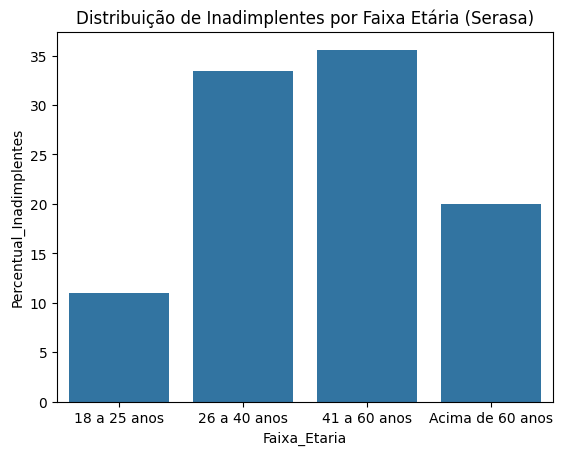

In [245]:
plt.title('Distribuição de Inadimplentes por Faixa Etária (Serasa)')
sns.barplot(x='Faixa_Etaria', y='Percentual_Inadimplentes', data=df_inadimplencia)

In [246]:
plt.show()

A menor fatia de inadimplência entre jovens (11.0% em Dez/2025) pode ser um ponto de partida para campanhas de marketing focadas em **prevenção** e **educação financeira** no início da vida adulta, transformando a vulnerabilidade em oportunidade de fidelização.

Visualização da Inadimplência por Segmento

In [264]:
df_inad_segmento = pd.DataFrame({
    'segmento': [
        'Bancos / Cartão de Crédito',
        'Utilities',
        'Financeiras',
        'Serviços'
    ],
    'percentual_inadimplencia': [26.1, 22.1, 19.6, 11.9],
    'fonte': 'Serasa - Dez/2025'
})

df_inad_segmento


,segmento,percentual_inadimplencia,fonte
0,Bancos / Cartão de Crédito,26.1,Serasa - Dez/2025
1,Utilities,22.1,Serasa - Dez/2025
2,Financeiras,19.6,Serasa - Dez/2025
3,Serviços,11.9,Serasa - Dez/2025


Text(0, 0.5, 'Percentual de Inadimplência (%)')

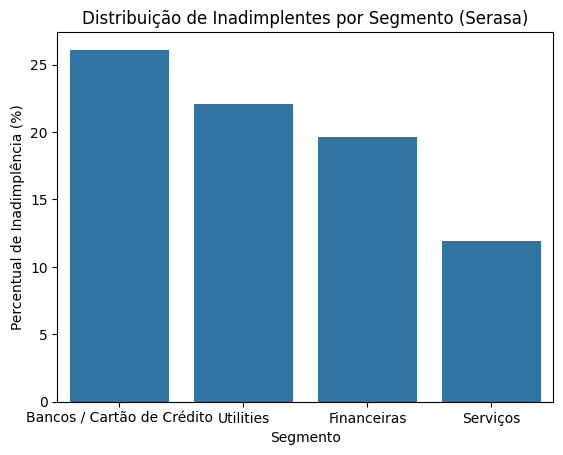

In [267]:
plt.title('Distribuição de Inadimplentes por Segmento (Serasa)')
sns.barplot(x='segmento', y='percentual_inadimplencia', data=df_inad_segmento)
plt.xlabel('Segmento')
plt.ylabel('Percentual de Inadimplência (%)')

## Cruzamento dos dados do formulário de coleta

In [250]:
##Padronização dos Nomes das Variáveis

In [251]:
df_formulario = df_formulario.rename(columns={
'Qual sua idade?': 'idade',
'Qual seu gênero?': 'genero',
'Qual sua raça/cor? (autodeclaração)': 'raca',
'Você mora atualmente em um bairro considerado periférico/de baixa renda?': 'periferia',
'Você possui conta em banco/fintech?': 'conta_bancaria',
'Qual o principal meio de acesso à sua conta ou serviços financeiros ?': 'meio_acesso',
'Atualmente está com pagamentos atrasados?': 'inadimplencia',
'Você consegue guardar algum dinheiro todo mês?': 'reserva_mensal',
'Já participou de curso, palestra ou orientação sobre finanças?': 'educacao_financeira',
'Quando o assunto é dinheiro ou educação financeira, em quem você mais confia?': 'confianca_financeira'
})

In [252]:
df_formulario.dropna(how='all', inplace=True)

 Criação de Variáveis Analíticas

Variável Jovem Periférico

In [253]:
df_formulario['jovem_periferico'] = np.where(df_formulario['periferia'] == 'Sim', 1, 0)

Transformação Sim/Não em Binário

In [254]:
colunas_binarias = ['conta_bancaria', 'inadimplencia', 'reserva_mensal', 'educacao_financeira']


for col in colunas_binarias:
    df_formulario[col] = df_formulario[col].map({'Sim': 1, 'Não': 0})

## Testes de Hipóteses e Cruzamentos Estatísticos (IC Marketing)

#### H1: Exclusão Estrutural e Acesso**Hipótese:** Jovens negros periféricos (raca='Preta'/'Parda' E periferia='Sim') apresentam menor taxa de posse de conta bancária (`conta_bancaria`) em comparação com outros jovens.

#### H2: Barreira e Comportamento Financeiro**Hipótese:** A participação em cursos de educação financeira (`educacao_financeira`) está positivamente correlacionada com a capacidade de guardar dinheiro todo mês (`reserva_mensal`) e negativamente correlacionada com a inadimplência (`inadimplencia`).

#### H3: Implicações de Marketing - Confiança e Canais**Hipótese:** A confiança em fontes não-tradicionais (ex: influenciadores, amigos) para assuntos financeiros (`confianca_financeira`) é maior entre jovens que usam apenas o celular como principal meio de acesso (`meio_acesso`='Celular').**Variáveis do Questionário:***   `meio_acesso`: 'Qual o principal meio de acesso à sua conta ou serviços financeiros ?'*   `confianca_financeira`: 'Quando o assunto é dinheiro ou educação financeira, em quem você mais confia?'

variável composta: Jovem Negro Periférico

In [255]:
from scipy.stats import chi2_contingency
# 1. Criar a variável 'Jovem Negro Periférico'
df_formulario['jovem_negro_periferico'] = np.where(
    (df_formulario['raca'].isin(['Preta', 'Parda'])) &
    (df_formulario['periferia'] == 'Sim'),
    'Sim',
    'Não'
)

In [256]:
tabela_h1 = pd.crosstab(
    df_formulario['jovem_negro_periferico'],
    df_formulario['conta_bancaria']
)

print('Tabela de Contingência (Jovem Negro Periférico × Conta Bancária):')
print(tabela_h1)


Tabela de Contingência (Jovem Negro Periférico × Conta Bancária):
Empty DataFrame
Columns: []
Index: []


In [257]:
if tabela_h1.shape == (2, 2):
    chi2, p, dof, expected = chi2_contingency(tabela_h1)

    print('\nResultado do Teste Qui-Quadrado:')
    print(f'Qui-quadrado: {chi2:.4f}')
    print(f'Graus de liberdade: {dof}')
    print(f'Valor-p: {p:.4f}')

    if p < 0.05:
        print('➡️ Rejeitamos H0: há associação estatisticamente significativa.')
    else:
        print('➡️ Não rejeitamos H0: não há evidência de associação.')
else:
    print('Tabela não é 2x2. Qui-quadrado não aplicado.')


Tabela não é 2x2. Qui-quadrado não aplicado.


In [258]:
# Correlação entre Educação Financeira (Binária) e Reserva Mensal (Binária)
# Usamos o coeficiente de correlação de Pearson (ou Phi, que é o mesmo para duas binárias)
correlacao_h2 = df_formulario['educacao_financeira'].corr(df_formulario['reserva_mensal'])
print(f'Correlação (Educação Financeira vs. Reserva Mensal): {correlacao_h2:.4f}')

# Correlação entre Educação Financeira (Binária) e Inadimplência (Binária)
correlacao_h2_inad = df_formulario['educacao_financeira'].corr(df_formulario['inadimplencia'])
print(f'Correlação (Educação Financeira vs. Inadimplência): {correlacao_h2_inad:.4f}')
print('Interpretação: Correlação positiva forte (próxima de 1) indica que quem tem educação financeira tende a ter reserva. Correlação negativa forte (próxima de -1) indica que quem tem educação financeira tende a não ser inadimplente.')

Correlação (Educação Financeira vs. Reserva Mensal): nan
Correlação (Educação Financeira vs. Inadimplência): 0.0278
Interpretação: Correlação positiva forte (próxima de 1) indica que quem tem educação financeira tende a ter reserva. Correlação negativa forte (próxima de -1) indica que quem tem educação financeira tende a não ser inadimplente.


In [259]:
# Tabela de Contingência (Meio de Acesso vs. Confiança)
tabela_h3 = pd.crosstab(df_formulario['meio_acesso'], df_formulario['confianca_financeira'], normalize='index') * 100
print('Tabela de Contingência (Meio de Acesso vs. Confiança - % por linha):')

# Filtrar para linhas onde o índice contém 'Celular' para analisar as formas de acesso via celular
tabela_h3_celular = tabela_h3[tabela_h3.index.str.contains('Celular', na=False)]
print(tabela_h3_celular.to_markdown(floatfmt='.1f'))
print("Interpretação: Analisar a linha 'Celular' e verificar se as colunas 'Influenciadores' ou 'Amigos/Família' têm percentuais mais altos em comparação com outras linhas (ex: 'Agência Física').")

Tabela de Contingência (Meio de Acesso vs. Confiança - % por linha):
| meio_acesso   |   Amigos investidores |   Amigos ou familiares |   Amigos ou familiares, Bancos tradicionais/ digitais |   Amigos ou familiares, Bancos tradicionais/ digitais, Eu mesmo(a) — prefiro aprender por conta própria, Professores ou especialistas |   Amigos ou familiares, Bancos tradicionais/ digitais, Professores ou especialistas |   Amigos ou familiares, Bancos tradicionais/ digitais, Sites ou canais de notícias, Influenciadores digitais, Professores ou especialistas |   Amigos ou familiares, Bancos tradicionais/ digitais, Sites ou canais de notícias, Professores ou especialistas, Influenciadores digitais |   Amigos ou familiares, Eu mesmo(a) — prefiro aprender por conta própria |   Amigos ou familiares, Eu mesmo(a) — prefiro aprender por conta própria, Bancos tradicionais/ digitais, Professores ou especialistas |   Amigos ou familiares, Eu mesmo(a) — prefiro aprender por conta própria, Sites ou canais de 

In [269]:
inad_jovens_amostra = (
    df_formulario
    .groupby('idade')['inadimplencia']
    .mean() * 100
)

inad_jovens_amostra

,inadimplencia
idade,
15 – 18 anos,0.000000
19 – 24 anos,21.917808
25 – 29 anos,36.363636
30 anos ou mais,50.000000
